<a href="https://colab.research.google.com/github/DuaneHsa/2022_ML_Earth_Env_Sci/blob/main/Project_4_reno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:

from sklearn.cluster import KMeans as KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
from mpl_toolkits.mplot3d import axes3d    

pd.set_option('precision', 2)

In [238]:
from google.colab import drive
path = '/content/Plume_reno.csv'
df = pd.read_csv(path)


In [239]:
df = pd.read_csv('/content/Plume_reno.csv',header=0)


df['time'] = df['time'].astype(str)+ df['loc'].astype(str)
df['time'] = df['time'].astype(int)
df.drop('loc', inplace=True, axis=1)
df = df.groupby((['time','pol']), as_index=False)['conc'].mean()
#(['col5','col2'])
df['conc'].fillna(0, inplace=True)
df



,time,pol,conc
0,42,Atenolol,38.46
1,42,Atrazin,10.76
2,42,Azithromycin,6.87
3,42,Benzotriazol,153.93
4,42,Bezafibrat,26.15
...,...,...,...
147,53,Simvastatin,0.00
148,53,Sotalol,2.14
149,53,Sulfamethoxazol,9.35
150,53,Terbutryn,2.78


In [240]:
df1 = df.pivot(index='time', columns='pol', values='conc')
df
df['pol'].replace({'Atenolol': 1, 'Atrazin': 2, 'Azithromycin':3,	'Benzotriazol':4,	'Bezafibrat':5,	'Carbamazepin':6, 'Carbendazim':7,	'Chloridazon':8,	'Ciprofloxacin':9,	'Clarithromycin':10,	'Clindamycin':11,	'Clofibric acid':12, 'Diclofenac':13, 'Diuron':14,	'Gabapentin':15,	'Gemfibrocil':16,	'Iopamidol':17,	'IPBC':18,	'Irgarol':19,	'Isoproturon':20, 'Ketoprofen':21,	'Mecoprop':22,	'Mefenamic acid':23,	'Methylbenzotriazol':24,	'Metoprolol':25,	'Metronidazol':26,	'Naproxen':27,	'Norfloxacin':28,	'Ofloxacin':29,	'Paracetamol':30,	'Primidon':31,'Propiconazol':32,	'Propranolol':33,	'Simvastatin':34,	'Sotalol':35,	'Sulfamethoxazol':36,	'Terbutryn':37,	'Trimethoprim':38}, inplace=True)
df['pol'] = df['pol'].astype(float)




In [241]:
km = KMeans(n_clusters=5,init='k-means++')
km.fit(X)

y_pred = km.fit_predict(df)
df['cluster']=y_pred
X = df.drop(['cluster'], axis=1)
y = df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,random_state = 0)



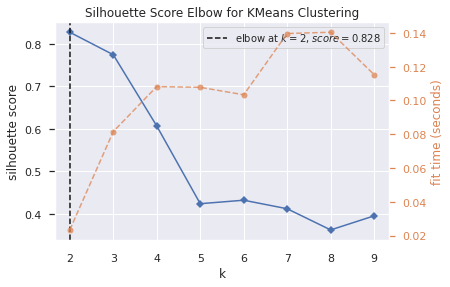

In [250]:

model = LogisticRegression(solver = 'lbfgs', max_iter=10000)
visualizer = ClassificationReport(model)


visualizer.fit(X_train, y_train)
#visualizer.score(X_test, y_test)
#visualizer.show()


from yellowbrick.cluster import KElbowVisualizer
model = KMeans(5)

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [243]:
km.inertia_

20582.6649405549

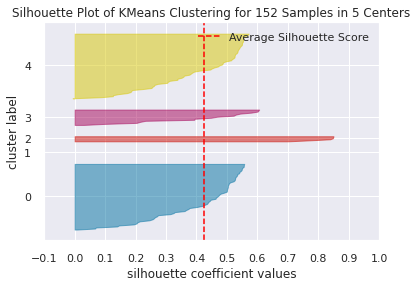

In [251]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
# Instantiate the clustering model and visualizer
model = KMeans(5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [245]:

df

,time,pol,conc,cluster
0,42,1.0,38.46,3
1,42,2.0,10.76,0
2,42,3.0,6.87,0
3,42,4.0,153.93,1
4,42,5.0,26.15,0
...,...,...,...,...
147,53,34.0,0.00,4
148,53,35.0,2.14,4
149,53,36.0,9.35,4
150,53,37.0,2.78,4


In [246]:
#scatter = plt.scatter(df['conc'],df['time'])

No handles with labels found to put in legend.


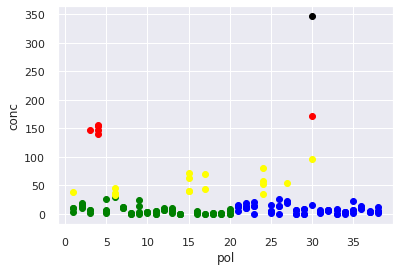

In [247]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.scatter(df1.pol,df1.conc,color='green')
plt.scatter(df2.pol,df2.conc,color='red')
plt.scatter(df3.pol,df3.conc,color='black')
plt.scatter(df4.pol,df4.conc,color='yellow')
plt.scatter(df5.pol,df5.conc,color='blue')


plt.xlabel('pol')
plt.ylabel('conc')
plt.legend()





In [248]:
frame = pd.DataFrame(df)
frame['cluster'] = y_train
print(frame['cluster'].value_counts())


frame2 = pd.DataFrame(df)
frame2['cluster'] = y_test
print(frame2['cluster'].value_counts())


0.0    59
4.0    56
3.0    15
1.0     5
2.0     1
Name: cluster, dtype: int64
4.0    8
0.0    6
3.0    1
1.0    1
Name: cluster, dtype: int64


In [249]:
import sklearn.metrics as metrics


score = metrics.accuracy_score(y_test,km.fit_predict(X_test))
print('Accuracy:{0:f}'.format(score))

Accuracy:0.312500
